<a href="https://colab.research.google.com/github/wanloc04/Ball-Mapper-for-Iris-and-Diabetes/blob/main/Ball_Mapper_for_Diabetes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes

Nhập bán kính epsilon (ví dụ 0.3): 1
Số đỉnh: 4, Số cạnh: 6


<ipython-input-5-0634a32b09fb>:78: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('viridis')(normalized)


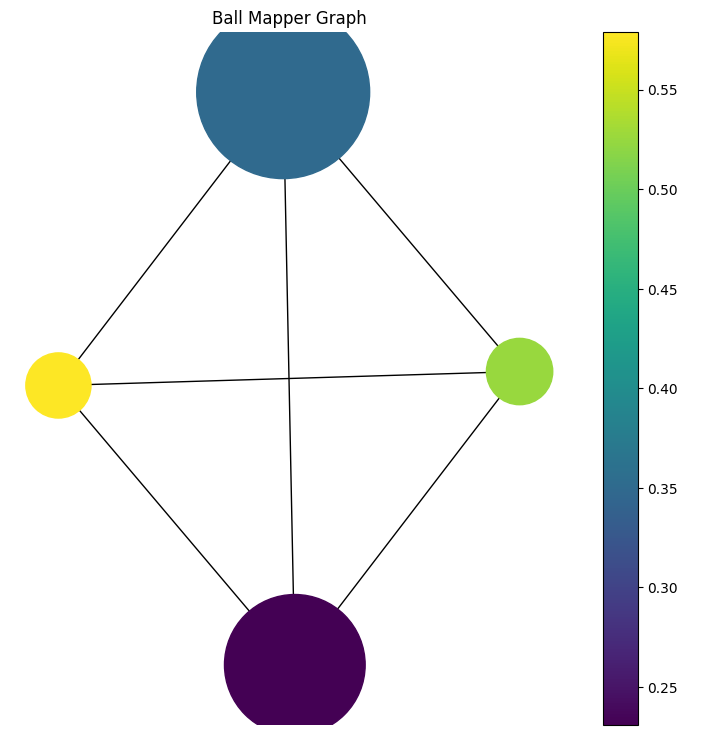

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import networkx as nx
import matplotlib.cm as cm
from matplotlib.patches import Patch

# === Bước 1: Đọc dữ liệu ===
file_path_diabetes = "/content/drive/MyDrive/Các bộ dữ liệu/diabetes.csv"  # Cập nhật đường dẫn của bạn
data = pd.read_csv(file_path_diabetes)

# Kiểm tra nếu dữ liệu quá ít cột
if data.shape[1] < 2:
    raise ValueError("Dữ liệu cần có ít nhất 2 cột (1 đặc trưng và 1 nhãn).")

# === Bước 2: Tách dữ liệu ===
X = data.drop(columns=['Outcome']).values if 'Outcome' in data.columns else data.iloc[:, :-1].values
y = data['Outcome'].values if 'Outcome' in data.columns else data.iloc[:, -1].values

# ✅ Tô màu theo Outcome
feature_values = y

# === Bước 3: Chuẩn hóa đặc trưng ===
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# === Bước 4: Thuật toán Max-min ε-net ===
def max_min_epsilon_net(X, epsilon):
    centers = [X[0]]
    for x in X:
        if np.min([np.linalg.norm(x - c) for c in centers]) > epsilon:
            centers.append(x)
    return np.array(centers)

# === Bước 5: Tạo đồ thị Ball Mapper ===
def ball_mapper_graph(X, centers, epsilon):
    G = nx.Graph()
    for i in range(len(centers)):
        G.add_node(i)

    point_covered_by = [[] for _ in range(len(X))]
    for i, x in enumerate(X):
        for j, c in enumerate(centers):
            if np.linalg.norm(x - c) <= epsilon:
                point_covered_by[i].append(j)

    for cover in point_covered_by:
        for i in range(len(cover)):
            for j in range(i + 1, len(cover)):
                G.add_edge(cover[i], cover[j])

    return G, point_covered_by

# === Bước 6: Nhập epsilon và tạo đồ thị ===
epsilon = float(input("Nhập bán kính epsilon (ví dụ 0.3): "))
centers = max_min_epsilon_net(X_scaled, epsilon)
G, point_covered_by = ball_mapper_graph(X_scaled, centers, epsilon)
print(f"Số đỉnh: {G.number_of_nodes()}, Số cạnh: {G.number_of_edges()}")

# === Bước 7: Tính trung bình của Outcome trong mỗi ball ===
center_feature = []
node_sizes = []

for j in range(len(centers)):
    indices = [i for i, cover in enumerate(point_covered_by) if j in cover]
    if indices:
        avg_value = np.mean(feature_values[indices])
        size = len(indices)
    else:
        avg_value = 0
        size = 1
    center_feature.append(avg_value)
    node_sizes.append(300 + size * 20)

# Chuẩn hóa và ánh xạ màu
normalized = MinMaxScaler().fit_transform(np.array(center_feature).reshape(-1, 1)).flatten()
colors = cm.get_cmap('viridis')(normalized)

# === Bước 8: Vẽ đồ thị ===
fig, ax = plt.subplots(figsize=(9, 9))
nx.draw(G, ax=ax,
        with_labels=False,
        node_size=node_sizes,
        node_color=colors,
        font_size=10,
        font_color='black',
        font_weight='bold')

plt.title("Ball Mapper Graph")

# === Thêm thanh màu (colorbar) ===
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(center_feature), vmax=max(center_feature)))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(" ")

plt.show()


Các thuộc tính có thể chọn để tô màu:
1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigreeFunction
8. Age
Nhập số thứ tự thuộc tính để tô màu (ví dụ 2 cho Glucose): 8
Số đỉnh: 18, Số cạnh: 79


<ipython-input-16-ebdd7b9a5194>:100: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('viridis')(normalized)


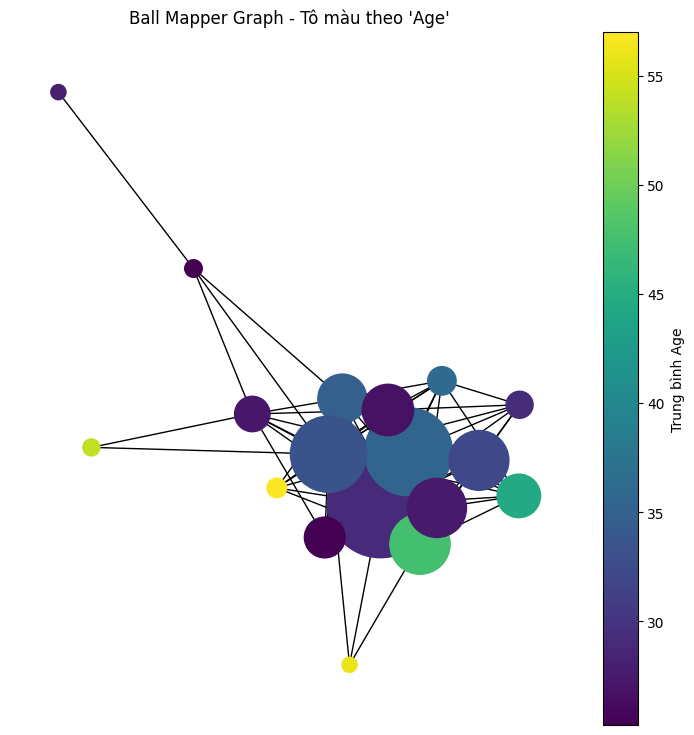

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import networkx as nx
import matplotlib.cm as cm
from sklearn.metrics import pairwise_distances

# === Bước 1: Đọc dữ liệu ===
file_path_diabetes = "/content/drive/MyDrive/Các bộ dữ liệu/diabetes.csv"  # Cập nhật đường dẫn phù hợp
data = pd.read_csv(file_path_diabetes)

# === Bước 2: Tách dữ liệu ===
X_df = data.drop(columns=['Outcome']) if 'Outcome' in data.columns else data.iloc[:, :-1]
X = X_df.values
y = data['Outcome'].values if 'Outcome' in data.columns else data.iloc[:, -1].values

# ✅ Cho phép chọn thuộc tính để tô màu
print("Các thuộc tính có thể chọn để tô màu:")
for i, col in enumerate(X_df.columns):
    print(f"{i + 1}. {col}")

feature_idx = int(input("Nhập số thứ tự thuộc tính để tô màu (ví dụ 2 cho Glucose): ")) - 1

if not (0 <= feature_idx < X.shape[1]):
    raise ValueError("Chỉ số không hợp lệ. Hãy nhập số từ danh sách.")

feature_values = X[:, feature_idx]

# === Bước 3: Chuẩn hóa dữ liệu ===
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# === Bước 4: Thuật toán Max-Min ε-net ===
def max_min_epsilon_net(X, epsilon):
    C = []
    B = {i: [] for i in range(len(X))}
    if len(X) > 3:
        C.append(3)
    else:
        C.append(0)
    while True:
        distances = pairwise_distances(X, X[C])
        min_distances = np.min(distances, axis=1)
        farthest_point = np.argmax(min_distances)
        max_distance = min_distances[farthest_point]
        if max_distance <= epsilon:
            break
        C.append(farthest_point)
    for c in C:
        distances = pairwise_distances([X[c]], X).ravel()
        covered_points = np.where(distances <= epsilon)[0]
        for x in covered_points:
            B[x].append(c)
    return np.array([X[i] for i in C]), B, C  # Trả thêm chỉ số gốc của tâm

# === Bước 5: Tạo đồ thị Ball Mapper ===
def ball_mapper_graph(X, centers, epsilon):
    G = nx.Graph()
    for i in range(len(centers)):
        G.add_node(i)

    point_covered_by = [[] for _ in range(len(X))]
    for i, x in enumerate(X):
        for j, c in enumerate(centers):
            if np.linalg.norm(x - c) <= epsilon:
                point_covered_by[i].append(j)

    for cover in point_covered_by:
        for i in range(len(cover)):
            for j in range(i + 1, len(cover)):
                G.add_edge(cover[i], cover[j])

    return G, point_covered_by

# === Bước 6: Nhập epsilon và tạo đồ thị ===
epsilon = 0.7
centers, B_dict, center_indices = max_min_epsilon_net(X_scaled, epsilon)
G, point_covered_by = ball_mapper_graph(X_scaled, centers, epsilon)

print(f"Số đỉnh: {G.number_of_nodes()}, Số cạnh: {G.number_of_edges()}")

# === Bước 7: Tính giá trị trung bình thuộc tính đã chọn trong mỗi ball ===
center_feature = []
node_sizes = []

for j in range(len(centers)):
    indices = [i for i, cover in enumerate(point_covered_by) if j in cover]
    if indices:
        avg_value = np.mean(feature_values[indices])
        size = len(indices)
    else:
        avg_value = 0
        size = 1
    center_feature.append(avg_value)
    node_sizes.append(100 + size * 10)

# Chuẩn hóa và ánh xạ màu
normalized = MinMaxScaler().fit_transform(np.array(center_feature).reshape(-1, 1)).flatten()
colors = cm.get_cmap('viridis')(normalized)

# === Bước 8: Vẽ đồ thị ===
fig, ax = plt.subplots(figsize=(9, 9))
nx.draw(G, ax=ax,
        with_labels=False,
        node_size=node_sizes,
        node_color=colors,
        font_size=10,
        font_color='black',
        font_weight='bold')

plt.title(f"Ball Mapper Graph - Tô màu theo '{X_df.columns[feature_idx]}'")

# === Thanh màu (colorbar) ===
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(center_feature), vmax=max(center_feature)))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(f"Trung bình {X_df.columns[feature_idx]}")

plt.show()
